In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display

In [4]:
#Beat track function from Johanna

def beatTrack(filename):
    
    # Load audio
    y, sr = librosa.load(filename)
            
    # Harmonic-percussive source separation
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    
    # Now, let's run the beat tracker.
    # We'll use the percussive component for this part
    tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)
        
    beatTimes = librosa.frames_to_time(beats)
    
    return tempo, beats, beatTimes

In [11]:
def runBeatTrack(file):
    
    y, sr = librosa.load(file)
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

    delta_mfcc  = librosa.feature.delta(mfcc)
    delta2_mfcc = librosa.feature.delta(mfcc, order=2)

    M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

    y_harmonic, y_percussive = librosa.effects.hpss(y)
    
    C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)
    
    tempo, beats, times = beatTrack(file)
    
    C_sync = librosa.util.sync(C, beats, aggregate=np.min)
    
    plt.figure(figsize=(12,6))

    plt.subplot(2, 1, 1)
    librosa.display.specshow(C, sr=sr, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time')

    plt.title(file + ': Chroma')
    plt.colorbar()

    plt.subplot(2, 1, 2)
    librosa.display.specshow(C_sync, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time', 
                         x_coords=librosa.frames_to_time(librosa.util.fix_frames(beats)))


    plt.title(file + ': Beat-synchronous Chroma')

    plt.colorbar()
    plt.tight_layout()

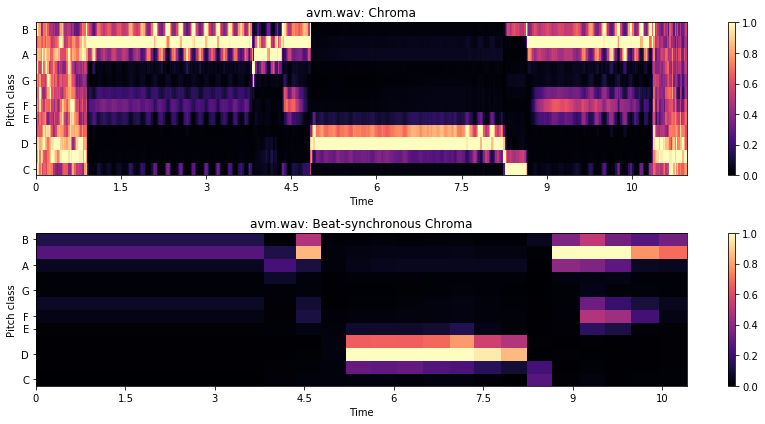

In [12]:
runBeatTrack('avm.wav')

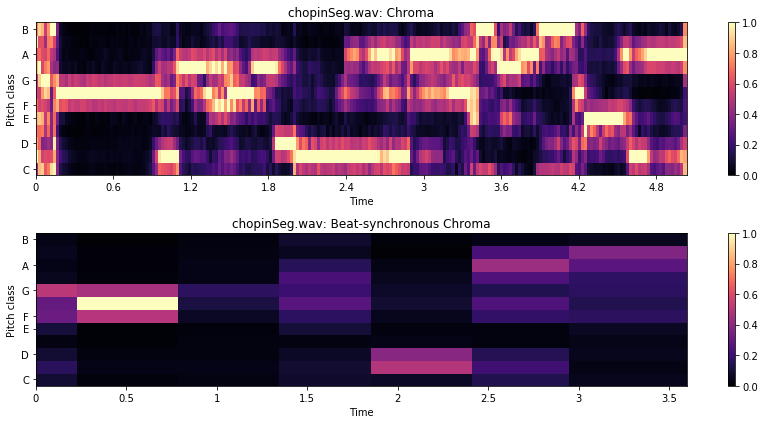

In [13]:
runBeatTrack('chopinSeg.wav')

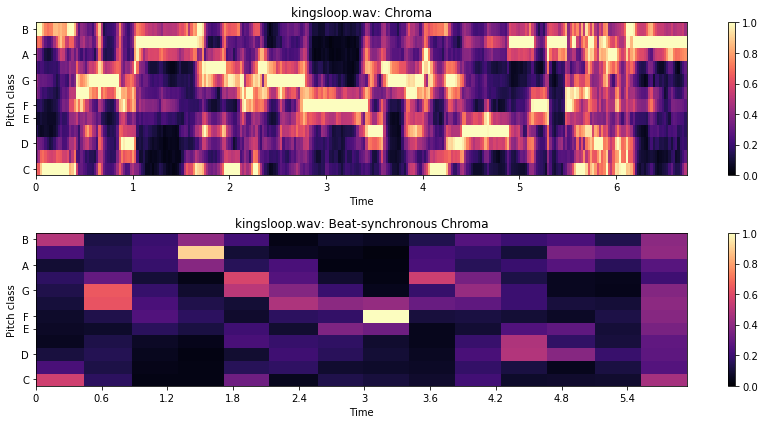

In [14]:
runBeatTrack('kingsloop.wav')

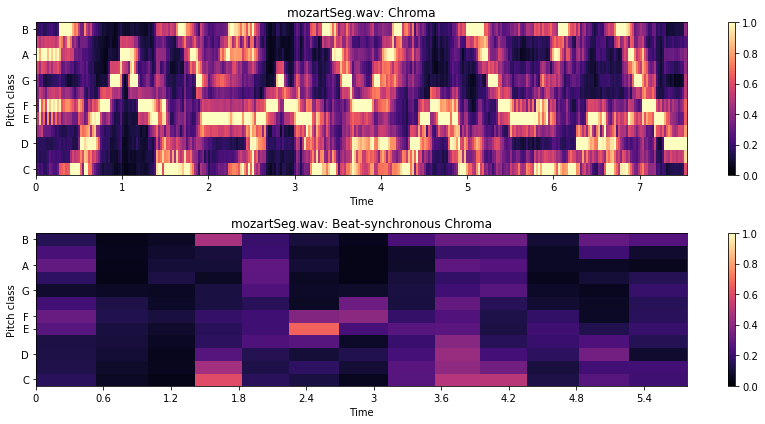

In [15]:
runBeatTrack('mozartSeg.wav')